#Библиотеки Python для DS (семинары)

## Урок 6. Определение проблемы переобучения на практике

Ваша задача — построить модель машинного обучения для предсказания целевой переменной на примере датасета ирисы Фишера. В процессе выполнения задания вы должны применить концепции переобучения и недообучения, кросс-валидации, регуляризации (L1 и L2), а также оценить способность вашей модели к обобщению.

1. Предварительная обработка данных.
    - Загрузите данные и проведите их первичный анализ.
    - Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
    - Разделите данные на тренировочный и тестовый наборы.

2. Обучение модели.
    - Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
    - Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

3. Анализ результатов.

    - Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?

    - Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?

4. Отчёт.
    - Подготовьте краткий отчёт, в котором обоснуйте свой выбор параметров для моделей с регуляризацией, объясните полученные результаты и сделайте выводы о качестве моделирования.

### 1. Предварительная обработка данных.

In [38]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import seaborn as sns

In [24]:
# Загрузка датасета
iris = load_iris()
X, y = iris.data, iris.target
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [25]:
# Первичный анализ данных
df=pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
df_with_target=df.copy()
df_with_target['target']=iris.target
df_with_target.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.info()
df.describe().T.round(2)

In [6]:
# Проверка на пропущенные значения
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
# Количество уникальных значений в датафрейме
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

<Axes: xlabel='target', ylabel='Count'>

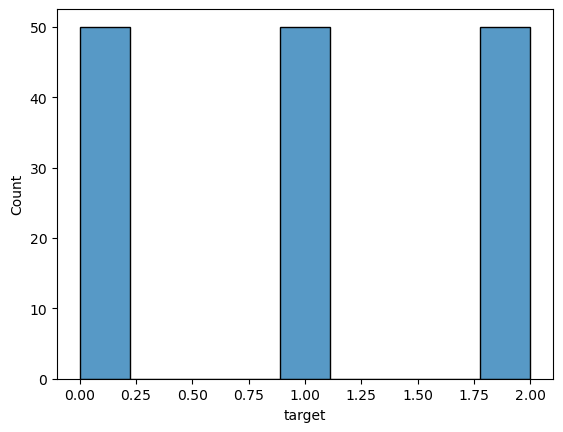

In [31]:

sns.histplot(df_with_target.target)

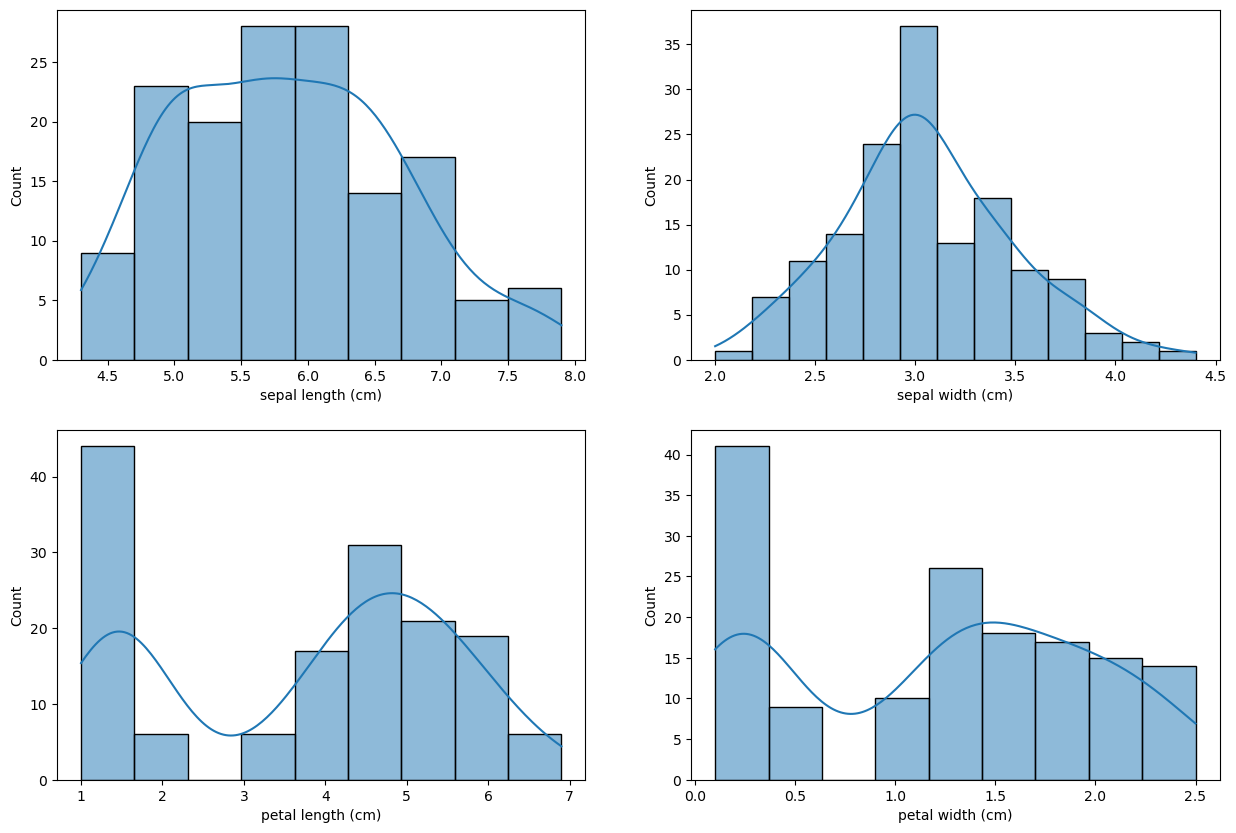

In [15]:
# Визуализация гистограмм

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)

plt.show()

**Вывод:**
- Данные ирисов Фишера содержат 150 образцов с 4 признаками и целевой переменной.
- Данные включают четыре числовых признака в сантиметрах:
    - длина чашелистика
    - ширина чашелистика
    - длина лепестка
    - ширина лепестка
- Целевая переменная - тип ириса, представленный тремя классами, классы сбалансированы.
- В данных нет пропущенных значений.
- Признаки 'sepal length' и 'sepal width' имеют нормальное распределение.
- Признаки 'petal length' и 'petal width' имеют бимодальное распределение.
- Распределение признаков, связанных с лепестками, имеет несколько пиков, что может свидетельствовать о наличии различий между типами ирисов.

In [32]:
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

### 2. Обучение модели.

In [41]:
# Логистическая регрессия без регуляризации
lr = LogisticRegression(penalty='none', random_state=42)
lr.fit(X_train, y_train)

# Предсказание
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Оценка качества
print("Линейная регрессия:")
print(f'Точность на тренировочном наборе {accuracy_score(y_train, y_pred_train).round(3)}')
print(f'Точность на тестовом наборе {accuracy_score(y_test, y_pred_test).round(3)}')
print("Тренировочный R^2:", r2_score(y_train, y_pred_train))
print("Тестовый R^2:", r2_score(y_test, y_pred_test).round(3))

Линейная регрессия:
Точность на тренировочном наборе 1.0
Точность на тестовом наборе 0.889
Тренировочный R^2: 1.0
Тестовый R^2: 0.833


Модель логистической регрессии без регуляризации показала следующие результаты:

- Точность на тренировочном наборе: 1.0, коэффициент детерминации 1.0
- Точность на тестовом наборе: 0.89, коэффициент детерминации 0.83
- Показатели на тестовом датасете хуже чем на тренировочном, возможно, модель переобучается. ПРоведем регуляризацию.

In [81]:
#модель с L1-регуляризацией
param_grid_l1 = {'C': np.logspace(-3, 3, 20)}
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
grid_search_l1 = GridSearchCV(lr_l1, param_grid_l1, scoring='r2')
grid_search_l1.fit(X_train, y_train)

best_l1 = grid_search_l1.best_estimator_
best_l1_C = grid_search_l1.best_params_['C']
accuracy_train_l1 = accuracy_score(y_train, best_l1.predict(X_train)).round(3)
accuracy_test_l1 = accuracy_score(y_test, best_l1.predict(X_test)).round(3)

(best_l1_C.round(3), accuracy_train_l1, accuracy_test_l1)


(112.884, 0.99, 0.933)

In [82]:
#модель с L2-регуляризацией
param_grid_l2 = {'C': np.logspace(-3, 3, 20)}
lr_l2 = LogisticRegression(penalty='l2', random_state=42)
grid_search_l2 = GridSearchCV(lr_l2, param_grid_l2, cv=5, scoring='r2')
grid_search_l2.fit(X_train, y_train)

best_l2 = grid_search_l2.best_estimator_
best_l2_C = grid_search_l2.best_params_['C']
accuracy_train_l2 = accuracy_score(y_train, best_l2.predict(X_train)).round(3)
accuracy_test_l2 = accuracy_score(y_test, best_l2.predict(X_test)).round(3)

(best_l2_C.round(3), accuracy_train_l2, accuracy_test_l2)

(0.695, 0.981, 0.911)

Результаты для моделей с L1 и L2 регуляризацией:

- Модель с L1-регуляризацией:
    - Оптимальное значение параметра регуляризации C= 112.884
    - Точность на тренировочном наборе: 0.99
    - Точность на тестовом наборе: 0.933


- Модель с L2-регуляризацией:
    - Оптимальное значение параметра регуляризации C= 0.695
    - Точность на тренировочном наборе: 0.981 
    - Точность на тестовом наборе: 0.911
  

### 3. Анализ результатов.

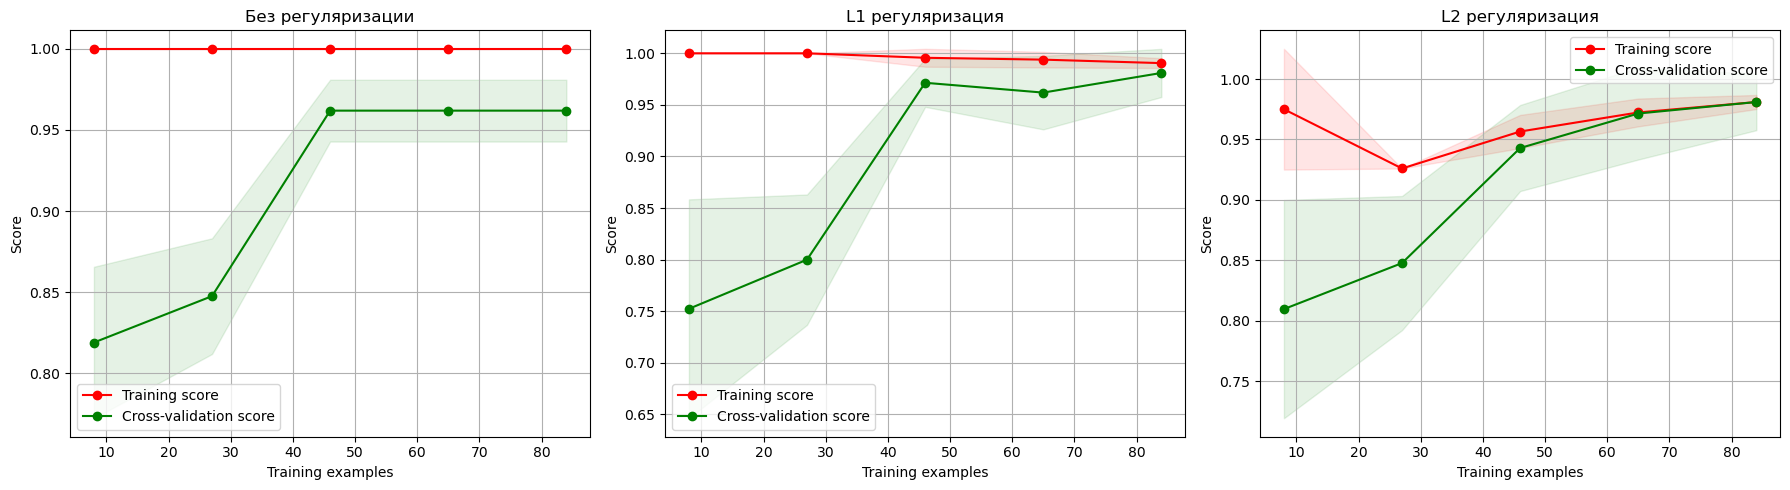

In [85]:
# Функция для построения кривых обучения
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

# Построение графиков
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plt.sca(axs[0])
plot_learning_curve(lr, "Без регуляризации", X_train, y_train)
plt.sca(axs[1])
plot_learning_curve(best_l1, "L1 регуляризация", X_train, y_train)
plt.sca(axs[2])
plot_learning_curve(best_l2, "L2 регуляризация", X_train, y_train)

# Показать графики
plt.tight_layout()
plt.show()

1. Модель без регуляризации:
    -  показала отличные результаты на тренировочном наборе (100% точность), но её точность на тестовом наборе немного ниже (89%), что может указывать на переобучение.

2. Модель с L1-регуляризацией:
    - При оптимальном значении параметра регуляризации C= 112.884 модель достигает 99% точности на тренировочном наборе и 93.3% на тестовом.
    - Регуляризация уменьшила переобучение и улучшила обобщение.
    - 
3. Модель с L2-регуляризацией:
    - Оптимальное значение C = 0.695 также улучшило способность модели к обобщению, метрики улучшились, но немного отстают от модели с L1 регуляризацией, и составляют 98.1% на тренировочном и 91.1% на тестовом наборах.

### 4. Отчёт

Регуляризация помогла уменьшить переобучение и улучшить обобщение модели. Обе регуляризации (L1 и L2) привели к улучшению модели, лучшие результаты показала L1 регуляризация за снижении размерности признаков.